<h1 style="text-align: center;"> EE6310 - IMAGE AND VIDEO PROCESSING </h1>
<h2 style="text-align: right;">  ATHARV RAMESH NAIR <br>EE20BTECH11006</h2>

<h2 style="text-align: center;">  1. CIRCULAR CONVOLUTIONS </h2>

In [1]:
from matplotlib import pyplot as plt
import numpy as np

### DFT and IDFT implementation from Assignment 2

In [2]:
def DFT_Matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * np.pi * 1j / N )
    W = np.power( omega, i * j )
    return W

def IDFT_Matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp(2 * np.pi * 1j / N )
    W = np.power( omega, i * j )/N
    return W

In [3]:
def DFT(img):
    img = img.astype('float64')
    M,N = img.shape
    WN = DFT_Matrix(N)
    WM = DFT_Matrix(M)
    res = np.matmul(np.matmul(WN,img),WM)
    
    return res
def IDFT(I):
  
    M,N = I.shape
    WN = IDFT_Matrix(N)
    WM = IDFT_Matrix(M)
    img  = np.dot(np.matmul(WM,I),WN)
    img = (np.real(img))
#     np.clip(img,0,255)
    return img

### Implentation of Circular Convolution

In [4]:
def circularConv(I,J):
        
    M,N = I.shape
    m,n = J.shape

    cc = np.zeros((M,N),dtype='float32')
#     h = np.flip(J)
    
#     H = np.vstack((np.hstack((h,h)),np.hstack((h,h))))
    I = np.flip(I)
    I = np.vstack((np.hstack((I,I)),np.hstack((I,I))))
    for k in range(M):
        for l in range(N):
#             print(k,l)
            cc[k][l] = np.sum(I[(M - 1 - k):(m + M -k-1), (N - 1 - l):(n + N - l-1)]*J)
             
    return cc


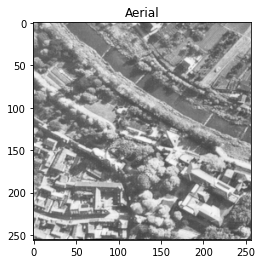

In [5]:
I = plt.imread('5.1.10.tiff')
M,N = I.shape
imgplot = plt.imshow(I,cmap = 'gray')
plt.title('Aerial')
plt.show()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs


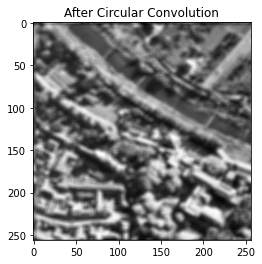

In [6]:
%time
avg_filter = (1/25)*np.ones((5,5))
m,n = avg_filter.shape
cc = circularConv(I,avg_filter)
imgplot = plt.imshow(cc,cmap = 'gray')
plt.title('After Circular Convolution')
plt.show()

In [7]:
%time
linear_filter = np.vstack((np.hstack((avg_filter,np.zeros((m,N)))),np.zeros((M,N+n))))
I_padded = np.vstack((np.hstack((I,np.zeros((M,n)))),np.zeros((m,N+n))))
lc = circularConv(I_padded,linear_filter)[:M,:N].astype('uint8')

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.77 µs


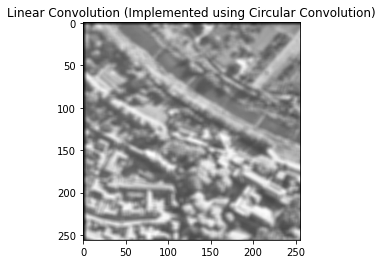

In [8]:
plt.imshow(lc,cmap = 'gray')
plt.title('Linear Convolution (Implemented using Circular Convolution)')
plt.show()

In [9]:
def convolve(I,H):
    M,N = I.shape
    m,n = H.shape
    H_padded = np.vstack((np.hstack((H,np.zeros((m,N)))),np.zeros((M,N+n))))
    I_padded = np.vstack((np.hstack((I,np.zeros((M,n)))),np.zeros((m,N+n))))
    conv = IDFT(DFT(I_padded)*DFT(H_padded))[:M,:N]
    conv = conv.astype('uint8')
    return conv

In [10]:
%time
linear = convolve(I,avg_filter)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.3 µs


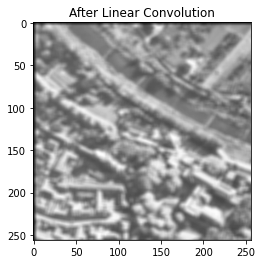

In [11]:
imgplot = plt.imshow(linear,cmap = 'gray')
plt.title('After Linear Convolution')
plt.show()

<h2 style="text-align: center;"> 2. LINEAR FILTERING </h2>

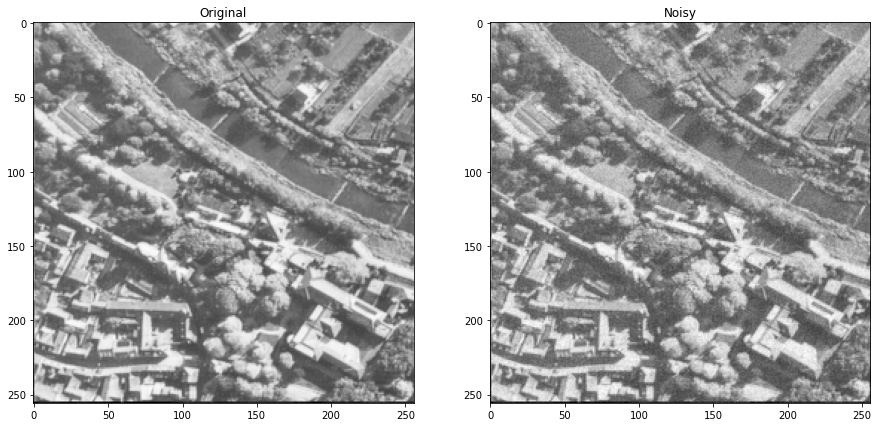

In [12]:
variance = 25
I_noise = I + variance*np.random.rand(M,N)

fig, (ax1,ax2) = plt.subplots(1,2,figsize =(15,15))
ax1.imshow(I,cmap ='gray')
ax1.set_title('Original')
ax2.imshow(I_noise,cmap = 'gray')
ax2.set_title('Noisy')
plt.show()

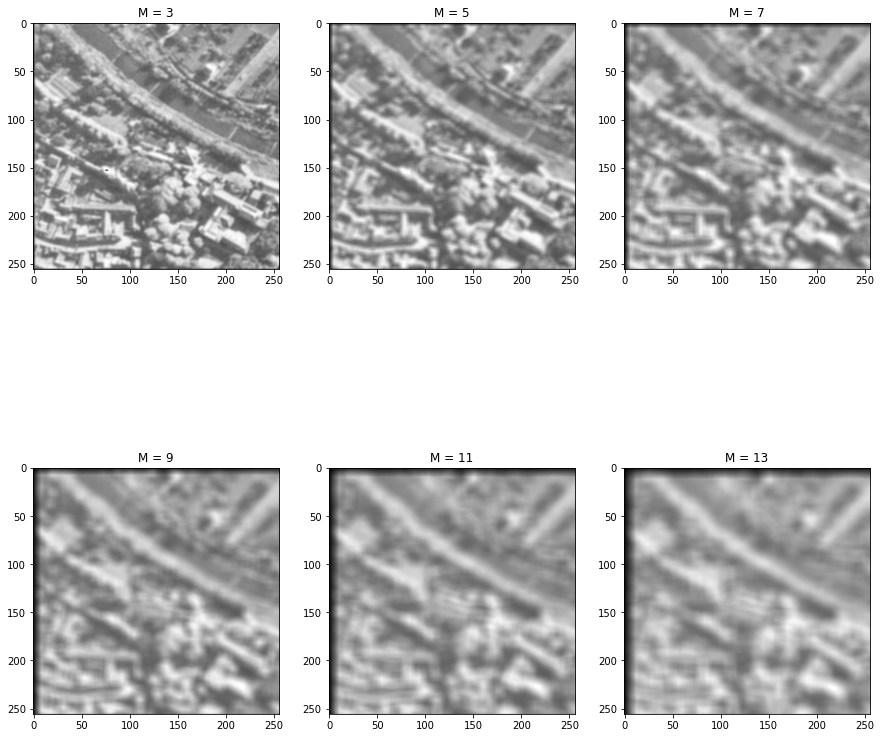

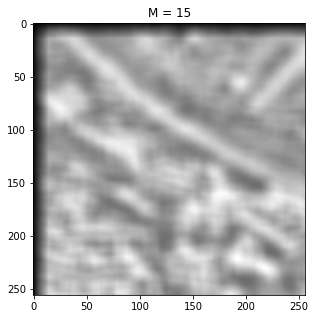

In [13]:
i = 0
fig,axs = plt.subplots(2,3,figsize =(15,15))
out = np.zeros((7,M,N))
for size in range(3,15,2):
    avg_filter = (1/size**2)*np.ones((size,size))
    out[i] = convolve(I_noise,avg_filter)
    axs[i//3][i%3].imshow(out[i],cmap = 'gray')
    axs[i//3][i%3].set_title(f'M = {2*i+3}')
    i+=1
plt.show()

## PLotting sigma = 15 separately
fig,ax = plt.subplots(1,1,figsize =(5,5))
size = 15
avg_filter =  (1/size**2)*np.ones((size,size))
out[6] = convolve(I_noise,avg_filter)

ax.imshow(out[6],cmap = 'gray')
ax.set_title('M = 15')
plt.show()

<h3 style="text-align: center;"> M = 3 is suitable for the averaging filter , The image size (256x256) could also be a factor affecting the window size</h3>

In [14]:
def gaussian(sigma,size):
    gaussian_filter = np.zeros((size,size))

    for i in range(size):
        for j in range(size):
            gaussian_filter[i][j] = np.exp(-((i-size//2)**2+(j-size//2)**2)/(2*sigma**2))

    gaussian_filter/= np.sum(gaussian_filter)

    return gaussian_filter


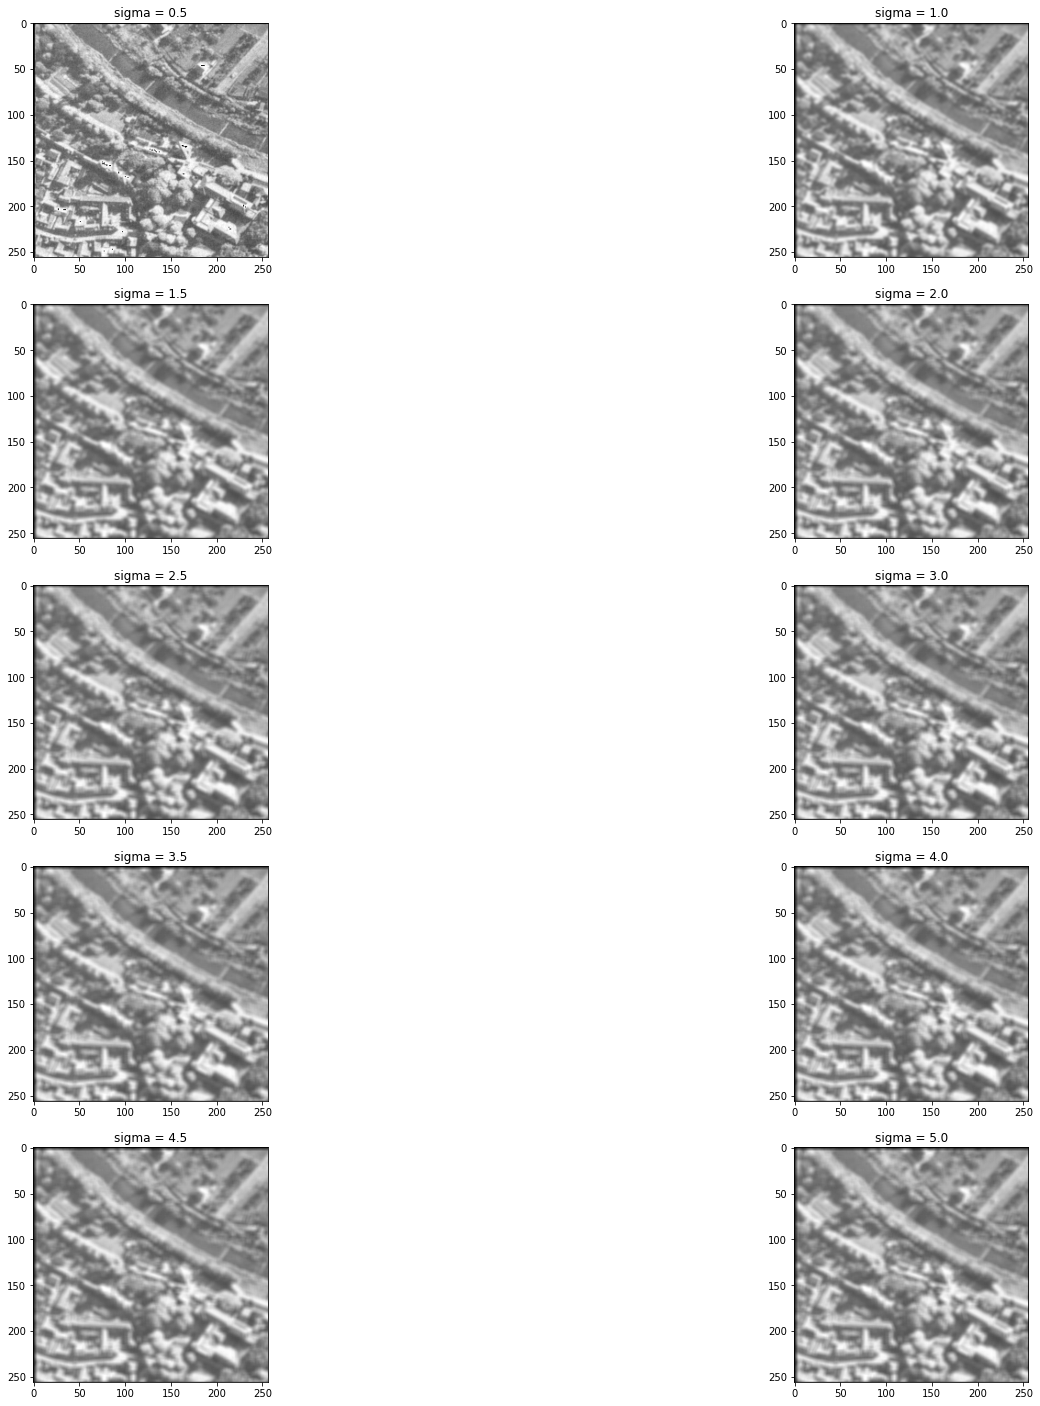

In [15]:
out = np.zeros((10,M,N))
fig,axs = plt.subplots(5,2,figsize =(25,25))

for i in range(10):
    sigma = i+1/2
    gf = gaussian(sigma,5)
    out[i] = convolve(I_noise,gf)
    axs[i//2][i%2].imshow(out[i],cmap = 'gray')
    axs[i//2][i%2].set_title(f'sigma = {(i+1)/2}')    

plt.show() 

<h3 style="text-align: center;"> sigma = 0.5 is suitable for the gaussian filter filter<br> At higher values, the fitler smoothens even important information. </h3>


<h2 style="text-align: center;">  3. IMAGE QUALITY ASSESMENT </h2>

### Function to find MSE and PSNR

In [16]:
def MSE_PSNR(I,J):
    M,N = I.shape
    MSE = np.sum((I.astype("float") - J.astype("float")) ** 2)
    MSE /= M*N
    L = 255
    PSNR = 10*np.log10(L**2/MSE)
    
    return MSE,PSNR

### Function to find Mean SSIM and get the SSIM Map

In [17]:
def SSIM(I,J):
    
    ## Guassian Window for weight
    w = gaussian(0.5,11)
    M,N = I.shape
    
    C1,C2,C3  = (0.01*255)**2,(0.03*255)**2,((0.03*255)**2)/2
    L,C,S =  np.zeros((M,N)),np.zeros((M,N)),np.zeros((M,N))
    for i in range(5,M-5):
        for j in range(5,N-5):
            
            ## Luminance
            meanI = np.sum(w*I[i-5:i+6,j-5:j+6])
            meanJ = np.sum(w*J[i-5:i+6,j-5:j+6])
            L[i][j] = (2*meanI*meanJ + C1)/(meanI**2 + meanJ**2 + C1)

            
            ## Contrast
            sigI = np.sqrt(np.sum(w*(I[i-5:i+6,j-5:j+6] - meanI)**2))
            sigJ = np.sqrt(np.sum(w*(J[i-5:i+6,j-5:j+6] - meanJ)**2))
            C[i][j] = (2*sigI*sigJ + C2 )/(sigI**2 + sigJ**2 + C2)
            
            ## Similairity
            sigIJ = np.sum(w*(I[i-5:i+6,j-5:j+6] - meanI)*(J[i-5:i+6,j-5:j+6] - meanJ))
            S[i][j] = (sigIJ + C3)/(sigI*sigJ + C3)
            
    SSIM = L*C*S
    num = np.count_nonzero(SSIM)
    MSSIM  = np.sum(SSIM)/num
    SSIM_MAP = 255*SSIM
    return MSSIM,SSIM_MAP
            

## PIL library for image compression

In [18]:
import os
from PIL import Image

def compressJPEG(img,quality_factor  = 50):
    PIL_img = Image.fromarray(np.uint8(img))
    PIL_img.save("Compressed_img","JPEG",optimize=True,quality=quality_factor)
    pic = Image.open("Compressed_img")
    pix = np.array(pic.getdata()).reshape(pic.size[0], pic.size[1])
    os.remove("Compressed_img")
    return pix

def gaussianBlur(img,sigma = 2):
    
    gf = gaussian(sigma,5)
    out = convolve(img,gf)
    return out



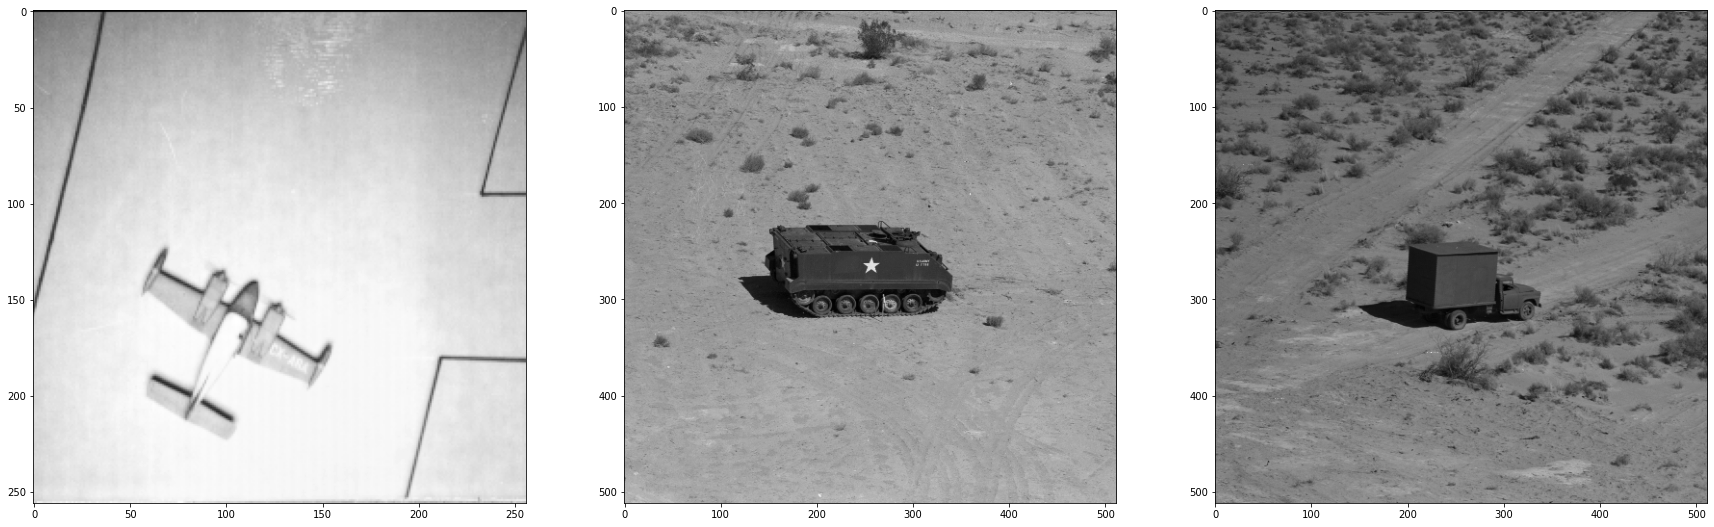

In [19]:
img1 = plt.imread('5.1.11.tiff')
img2 = plt.imread('7.1.08.tiff')
img3 = plt.imread('7.1.01.tiff')

fig, axs = plt.subplots(1,3,figsize = (30,30))
axs[0].imshow(img1,cmap = 'gray')
axs[1].imshow(img2,cmap = 'gray')
axs[2].imshow(img3,cmap = 'gray')
plt.show()

In [20]:
## Mean Shift
img1_shift = img1 + 16
img1_shift = np.clip(img1_shift,0,255)

img2_shift =  img2 + 16
img2_shift = np.clip(img2_shift,0,255)

img3_shift = img3 + 16
img3_shift = np.clip(img3_shift,0,255)


## Gaussian Noise
variance = 256
img1_noise = (img1 + variance*np.random.rand(img1.shape[0],img1.shape[1]))
img1_noise = np.clip(img1_noise,0,255)

img2_noise = (img2 + variance*np.random.rand(img2.shape[0],img2.shape[1]))
img2_noise = np.clip(img2_noise,0,255)

img3_noise = (img3 + variance*np.random.rand(img3.shape[0],img3.shape[1]))
img3_noise = np.clip(img3_noise,0,255)

## JPEG Compression

img1_compressed = compressJPEG(img1) 
img1_compressed = np.clip(img1_compressed,0,255)

img2_compressed = compressJPEG(img2) 
img2_compressed = np.clip(img2_compressed,0,255)

img3_compressed = compressJPEG(img3)
img3_compressed = np.clip(img3_compressed,0,255)

## Gaussian Noise

img1_blur = gaussianBlur(img1)
img1_blur = np.clip(img1_blur,0,255)

img2_blur = gaussianBlur(img2)
img2_blur = np.clip(img2_blur,0,255)

img3_blur = gaussianBlur(img3)
img3_blur = np.clip(img3_blur,0,255)


---------------------------------------------IMAGE 1 (AIRPLANE)-----------------------------------------------------


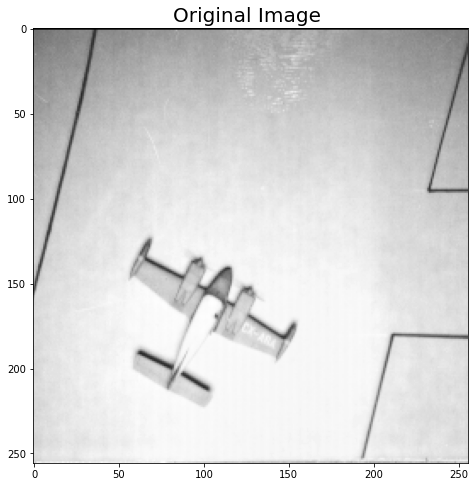

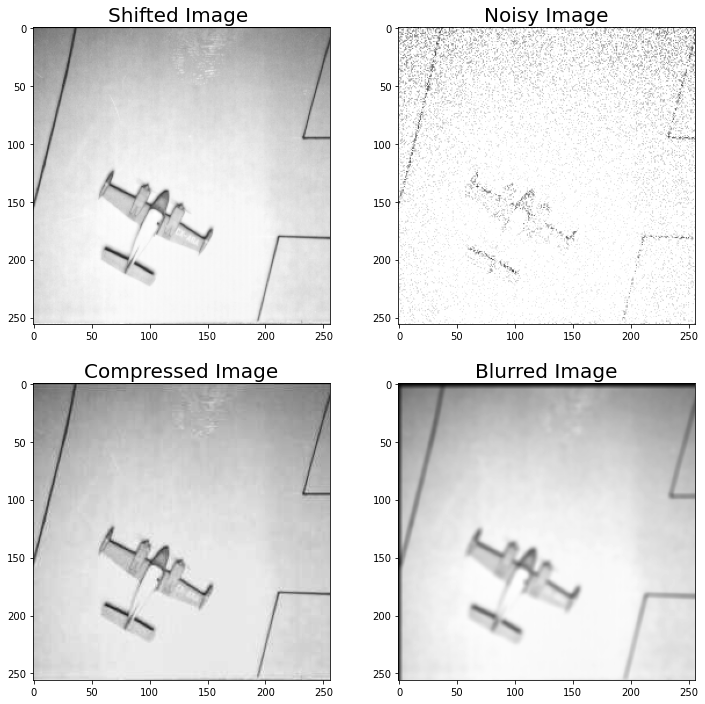

In [21]:
print('---------------------------------------------IMAGE 1 (AIRPLANE)-----------------------------------------------------')
plt.figure(figsize = (8,8))
plt.imshow(img1,cmap = 'gray')
plt.title('Original Image ', fontsize = 20)
plt.show()
fig, axs = plt.subplots(2,2,figsize = (12,12))

axs[0][0].imshow(img1_shift,cmap = 'gray')
axs[0][0].set_title('Shifted Image ', fontsize = 20)

axs[0][1].imshow(img1_noise,cmap ='gray')
axs[0][1].set_title('Noisy Image',fontsize = 20)

axs[1][0].imshow(img1_compressed,cmap ='gray')
axs[1][0].set_title('Compressed Image',fontsize = 20)

axs[1][1].imshow(img1_blur,cmap ='gray')
axs[1][1].set_title('Blurred Image',fontsize = 20)
plt.show()

<p style="text-align: center;"> <font size = "6"> <i>Subjective Rating </i></font><br> <font size ="4"> Original - 1 <br> Shifted - 0.9 <br>Compressed - 0.85 <br>   Blurred - 0.7 <br> Noisy - 0.5 </font>
    </p>

In [22]:
subjective  = np.array([0.9,0.5,0.85,0.7])

In [23]:
MSE1, PSNR1 =  MSE_PSNR(img1,img1_shift)
MSE2, PSNR2 =  MSE_PSNR(img1,img1_noise)
MSE3, PSNR3 =  MSE_PSNR(img1,img1_compressed)
MSE4, PSNR4 =  MSE_PSNR(img1,img1_blur)

PSNR = np.array([PSNR1,PSNR2,PSNR3,PSNR4])
print(f'Shift       MSE = {MSE1}, PSNR = {PSNR1}')
print(f'Noisy       MSE = {MSE2}, PSNR = {PSNR2}' )
print(f'Compressed  MSE = {MSE3}, PSNR = {PSNR3}' )
print(f'Blurred     MSE = {MSE4}, PSNR = {PSNR4}' )

corr = np.corrcoef(subjective,PSNR)[0,1]
print('----------------------------------------------------------------------------------------')
print('Correlation with Subjective Rating = ',corr)

Shift       MSE = 256.0, PSNR = 24.04840395556061
Noisy       MSE = 3561.79721330465, PSNR = 12.614111710775195
Compressed  MSE = 10.714065551757812, PSNR = 37.83126061683449
Blurred     MSE = 425.0809631347656, PSNR = 21.846087049495992
----------------------------------------------------------------------------------------
Correlation with Subjective Rating =  0.7743755621189554


---------------------------------------------SSIM MAP (AIRPLANE)--------------------------------------------
Correlation with Subjective Rating =  0.9484354456970883


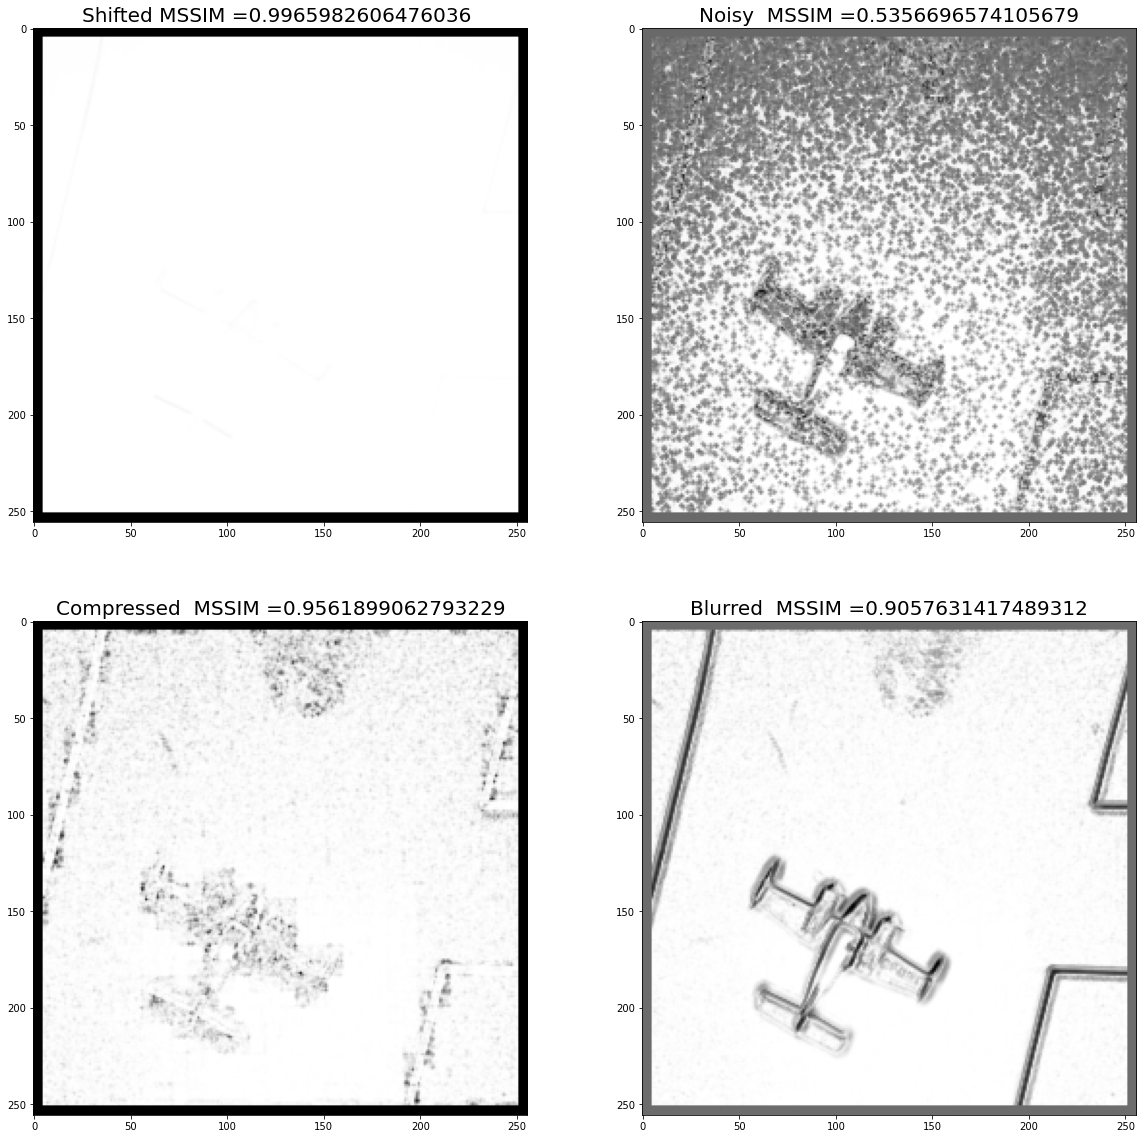

In [24]:
a1,b1  = SSIM(img1,img1_shift)
a2,b2  = SSIM(img1,img1_noise)
a3,b3  = SSIM(img1,img1_compressed)
a4,b4  = SSIM(img1,img1_blur)

MSSIM  =np.array([a1,a2,a3,a4])
fig, axs = plt.subplots(2,2,figsize = (20,20))
print('---------------------------------------------SSIM MAP (AIRPLANE)--------------------------------------------')


axs[0][0].imshow(b1,cmap = 'gray')
axs[0][0].set_title(f'Shifted MSSIM ={a1} ', fontsize = 20)

axs[0][1].imshow(b2,cmap ='gray')
axs[0][1].set_title(f'Noisy  MSSIM ={a2}',fontsize = 20)

axs[1][0].imshow(b3,cmap ='gray')
axs[1][0].set_title(f'Compressed  MSSIM ={a3}',fontsize = 20)

axs[1][1].imshow(b4,cmap ='gray')
axs[1][1].set_title(f'Blurred  MSSIM ={a4}',fontsize = 20)


corr = np.corrcoef(subjective,MSSIM)[0,1]
print('Correlation with Subjective Rating = ',corr)
plt.show()

---------------------------------------------IMAGE 2 (TANK)-----------------------------------------------------


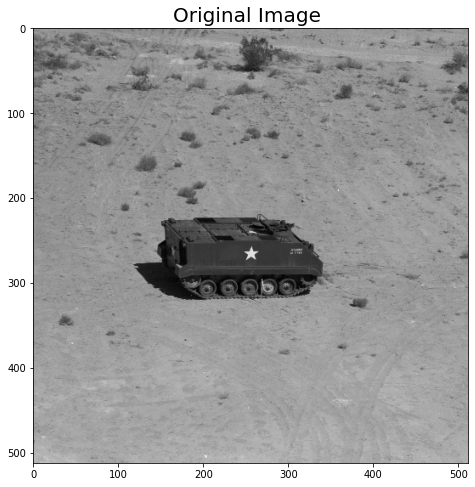

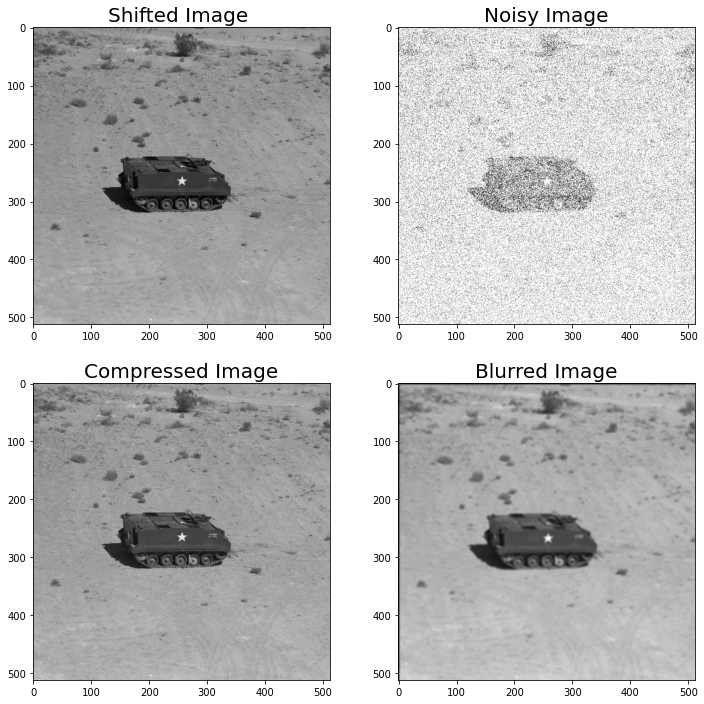

In [25]:
print('---------------------------------------------IMAGE 2 (TANK)-----------------------------------------------------')
plt.figure(figsize = (8,8))
plt.imshow(img2,cmap = 'gray')
plt.title('Original Image ', fontsize = 20)
plt.show()
fig, axs = plt.subplots(2,2,figsize = (12,12))

axs[0][0].imshow(img2_shift,cmap = 'gray')
axs[0][0].set_title('Shifted Image ', fontsize = 20)

axs[0][1].imshow(img2_noise,cmap ='gray')
axs[0][1].set_title('Noisy Image',fontsize = 20)
axs[1][0].imshow(img2_compressed,cmap ='gray')
axs[1][0].set_title('Compressed Image',fontsize = 20)

axs[1][1].imshow(img2_blur,cmap ='gray')
axs[1][1].set_title('Blurred Image',fontsize = 20)
plt.show()

<p style="text-align: center;"> <font size = "6"> <i>Subjective Rating </i></font><br> <font size ="4"> Original - 1 <br> Shifted - 0.9 <br>Compressed - 0.85 <br>   Blurred - 0.8 <br> Noisy - 0.4 </font>
    </p>

In [26]:
subjective  = np.array([0.9,0.4,0.85,0.8])

In [27]:
MSE1, PSNR1 =  MSE_PSNR(img2,img2_shift)
MSE2, PSNR2 =  MSE_PSNR(img2,img2_noise)
MSE3, PSNR3 =  MSE_PSNR(img2,img2_compressed)
MSE4, PSNR4 =  MSE_PSNR(img2,img2_blur)

PSNR = np.array([PSNR1,PSNR2,PSNR3,PSNR4])
print(f'Shift       MSE = {MSE1}, PSNR = {PSNR1}')
print(f'Noisy       MSE = {MSE2}, PSNR = {PSNR2}' )
print(f'Compressed  MSE = {MSE3}, PSNR = {PSNR3}' )
print(f'Blurred     MSE = {MSE4}, PSNR = {PSNR4}' )

corr = np.corrcoef(subjective,PSNR)[0,1]
print('----------------------------------------------------------------------------------------')
print('Correlation with Subjective Rating = ',corr)

Shift       MSE = 256.0, PSNR = 24.04840395556061
Noisy       MSE = 10798.957090465996, PSNR = 7.796985453555805
Compressed  MSE = 21.864246368408203, PSNR = 34.73345848484195
Blurred     MSE = 170.36395263671875, PSNR = 25.81702653225285
----------------------------------------------------------------------------------------
Correlation with Subjective Rating =  0.8829541338352196


---------------------------------------------SSIM MAP (TANK)--------------------------------------------
               Correlation with Subjective Rating =  0.9995352404426227


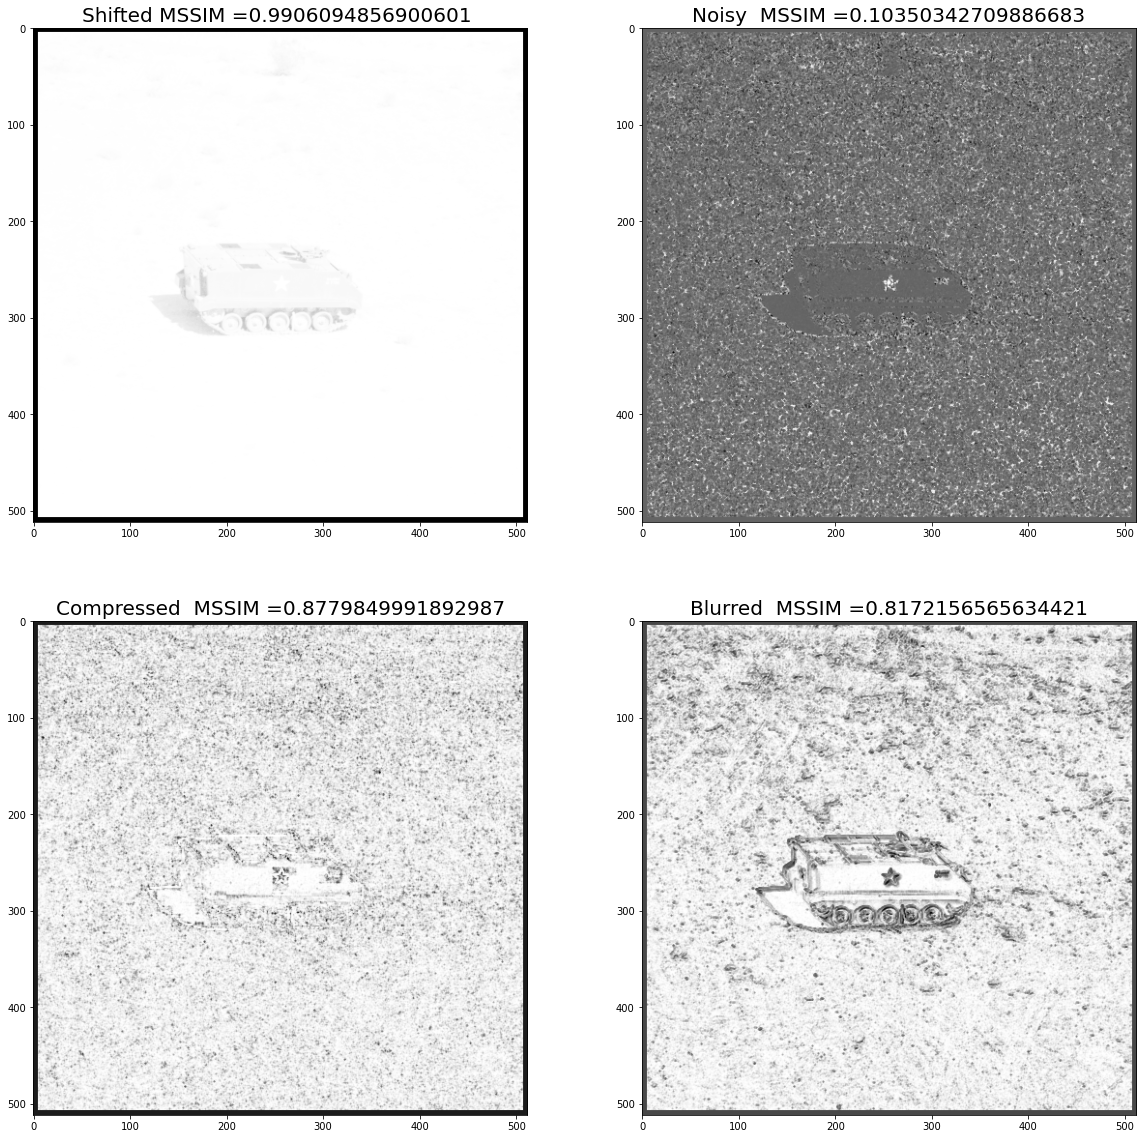

In [28]:
a1,b1  = SSIM(img2,img2_shift)
a2,b2  = SSIM(img2,img2_noise)
a3,b3  = SSIM(img2,img2_compressed)
a4,b4  = SSIM(img2,img2_blur)

MSSIM  =np.array([a1,a2,a3,a4])
fig, axs = plt.subplots(2,2,figsize = (20,20))
print('---------------------------------------------SSIM MAP (TANK)--------------------------------------------')


axs[0][0].imshow(b1,cmap = 'gray')
axs[0][0].set_title(f'Shifted MSSIM ={a1} ', fontsize = 20)

axs[0][1].imshow(b2,cmap ='gray')
axs[0][1].set_title(f'Noisy  MSSIM ={a2}',fontsize = 20)

axs[1][0].imshow(b3,cmap ='gray')
axs[1][0].set_title(f'Compressed  MSSIM ={a3}',fontsize = 20)

axs[1][1].imshow(b4,cmap ='gray')
axs[1][1].set_title(f'Blurred  MSSIM ={a4}',fontsize = 20)


corr = np.corrcoef(subjective,MSSIM)[0,1]
print('               Correlation with Subjective Rating = ', corr)
plt.show()

---------------------------------------------IMAGE 3 (APC)-----------------------------------------------------


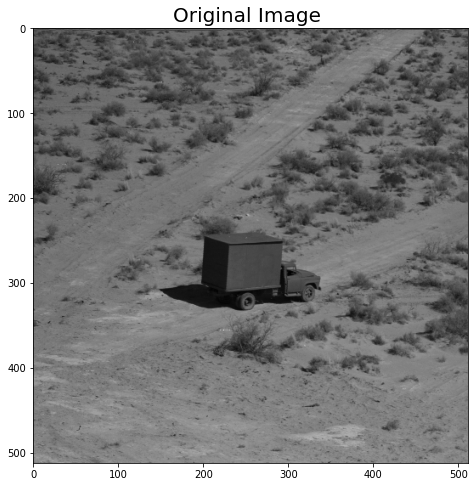

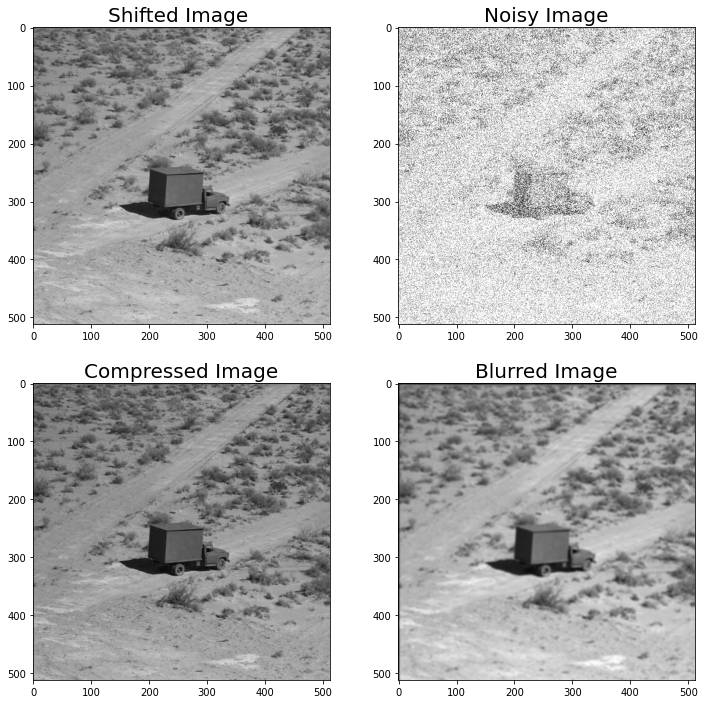

In [29]:
print('---------------------------------------------IMAGE 3 (APC)-----------------------------------------------------')
plt.figure(figsize = (8,8))
plt.imshow(img3,cmap = 'gray')
plt.title('Original Image ', fontsize = 20)
plt.show()
fig, axs = plt.subplots(2,2,figsize = (12,12))

axs[0][0].imshow(img3_shift,cmap = 'gray')
axs[0][0].set_title('Shifted Image ', fontsize = 20)

axs[0][1].imshow(img3_noise,cmap ='gray')
axs[0][1].set_title('Noisy Image',fontsize = 20)

axs[1][0].imshow(img3_compressed,cmap ='gray')
axs[1][0].set_title('Compressed Image',fontsize = 20)

axs[1][1].imshow(img3_blur,cmap ='gray')
axs[1][1].set_title('Blurred Image',fontsize = 20)
plt.show()

<p style="text-align: center;"> <font size = "6"> <i>Subjective Rating </i></font><br> <font size ="4"> Original - 1 <br> Shifted - 0.9 <br>Compressed - 0.85 <br>   Blurred - 0.8 <br> Noisey - 0.45 </font>
    </p>

In [30]:
subjective  = np.array([0.9,0.45,0.85,0.8])

In [31]:
MSE1, PSNR1 =  MSE_PSNR(img3,img3_shift)
MSE2, PSNR2 =  MSE_PSNR(img3,img3_noise)
MSE3, PSNR3 =  MSE_PSNR(img3,img3_compressed)
MSE4, PSNR4 =  MSE_PSNR(img3,img3_blur)

PSNR = np.array([PSNR1,PSNR2,PSNR3,PSNR4])
print(f'Shift       MSE = {MSE1}, PSNR = {PSNR1}')
print(f'Noisy       MSE = {MSE2}, PSNR = {PSNR2}' )
print(f'Compressed  MSE = {MSE3}, PSNR = {PSNR3}' )
print(f'Blurred     MSE = {MSE4}, PSNR = {PSNR4}' )

corr = np.corrcoef(subjective,PSNR)[0,1]
print('----------------------------------------------------------------------------------------')
print('Correlation with Subjective Rating = ',corr)

Shift       MSE = 256.21875, PSNR = 24.044694527754935
Noisy       MSE = 13315.0441387723, PSNR = 6.887377504238947
Compressed  MSE = 23.601360321044922, PSNR = 34.40143325571634
Blurred     MSE = 209.4293441772461, PSNR = 24.920428281220353
----------------------------------------------------------------------------------------
Correlation with Subjective Rating =  0.8876825109267735


---------------------------------------------SSIM MAP (APC)--------------------------------------------
                                  Correlation with Subjective Rating =  0.9995967361673899


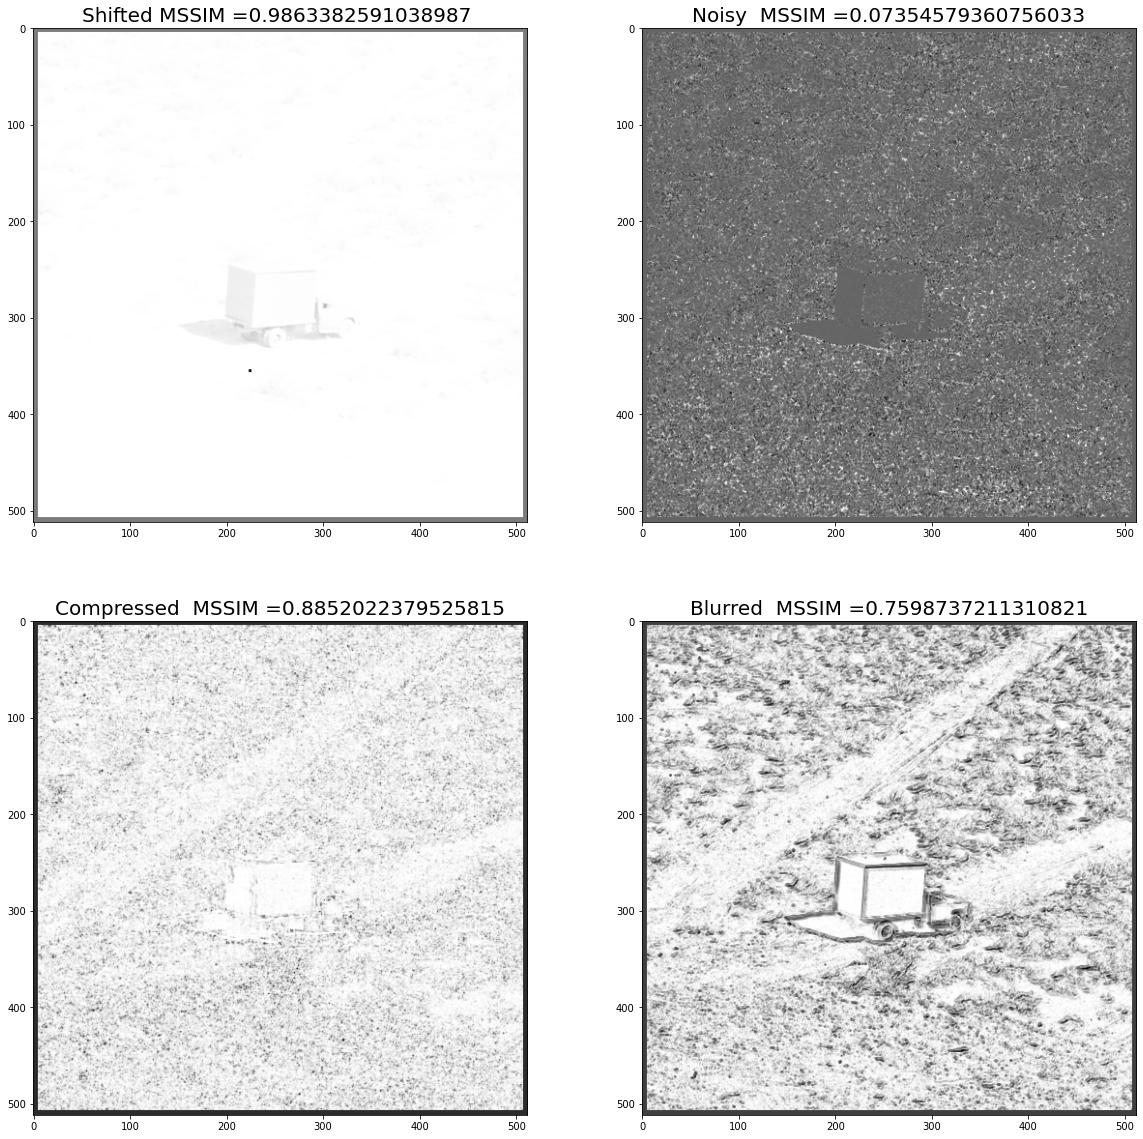

In [32]:
a1,b1  = SSIM(img3,img3_shift)
a2,b2  = SSIM(img3,img3_noise)
a3,b3  = SSIM(img3,img3_compressed)
a4,b4  = SSIM(img3,img3_blur)

MSSIM  =np.array([a1,a2,a3,a4])
fig, axs = plt.subplots(2,2,figsize = (20,20))
print('---------------------------------------------SSIM MAP (APC)--------------------------------------------')


axs[0][0].imshow(b1,cmap = 'gray')
axs[0][0].set_title(f'Shifted MSSIM ={a1} ', fontsize = 20)

axs[0][1].imshow(b2,cmap ='gray')
axs[0][1].set_title(f'Noisy  MSSIM ={a2}',fontsize = 20)

axs[1][0].imshow(b3,cmap ='gray')
axs[1][0].set_title(f'Compressed  MSSIM ={a3}',fontsize = 20)

axs[1][1].imshow(b4,cmap ='gray')
axs[1][1].set_title(f'Blurred  MSSIM ={a4}',fontsize = 20)


corr = np.corrcoef(subjective,MSSIM)[0,1]
print('                                  Correlation with Subjective Rating = ',corr)
plt.show()

<h3 style="text-align: center;">Based on the correlation value obtained above, we can say that the SSIM index is a much more reliable measure of structural similarity</h3>